<a href="https://colab.research.google.com/github/jorgemelo10/CursoPyTorch-/blob/main/PyTorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##1. Data (PREPARING AND LOADING)
* Excel speadsheet
* Images of any kind
* Videos (youtube has lot of data...)
* Audio like songs and podcasts
* DNA
* Text

Machine learning ia a game pf two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's creat some *known* data  using the linear regression formula.
We'll use a linear regression formula to make a straight line with known *parameters*.

In [19]:
#Create known parameters
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets (one of the most concepts in machine learning in general)

In [20]:
## Create a train/test split
train_split = int(0.8* len(X))
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

len(x_train) , len(y_train), len(x_test), len(y_test)



(40, 40, 10, 10)

How might we better visualize our data?
This is where the data explorer's motto comes in!

In [21]:
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_label = y_test,
                     predictions = None):

    """
    Plots training ddata, test data and compare predictions.
    """
    plt.figure(figsize=(10,7))

    #Plot training data in Blue
    plt.scatter(train_data, train_labels, c = "b", s=4, label= "Training data")

    #Plot test data in green
    plt.scatter(test_data,test_label, c="g", s=4, label="Testing data")

    #Are predictions?
    if predictions is not None:
    #Plot the Predictions if they exist
      plt.scatter(test_data, predictions, c="r", s=4, label= "Predictions")

    #Show the legend
    plt.legend(prop={"size": 14})

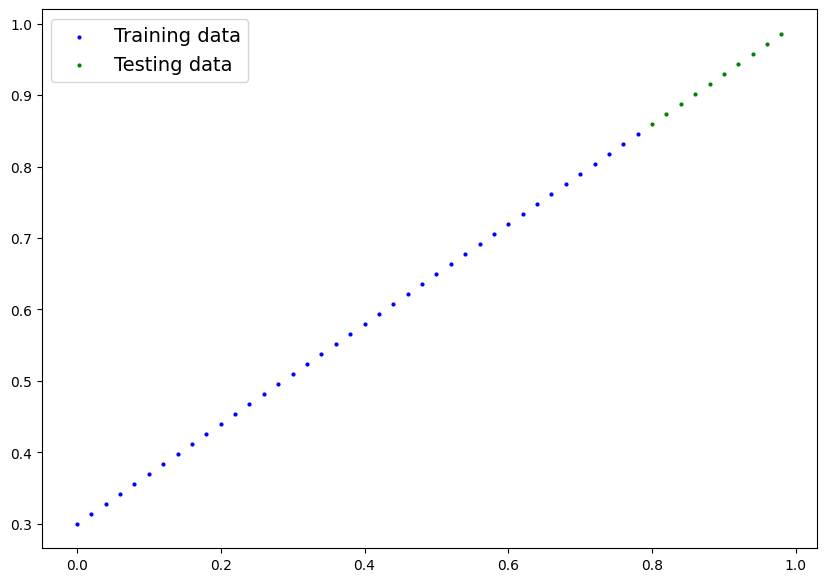

In [22]:
plot_predictions()

## 2. Build model
Our first PyTorch model

What the model does:
* Start with random values (wheight and bias)
* Look at training data and adjust the random values to better represent ( or get closer) the ideal values (the wheight and bias values we used to create the data)

In [23]:
from torch import nn

 # Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialize model parameters
    self.weight = nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype = torch.float))
  #Forward method to define the computaion in the model
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias





### PyTorch model building essentials
* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


### Checking the contents of our Pytorch model


In [39]:
# Create a random seed
torch.manual_seed(42)

#Create an instance of the model
model_0 = LinearRegressionModel()
#Check out the parametedrs
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

### Making predictions using `torch.inference_mode()`
To check our model's predictieve power, let's see how well it predicts `y_test`based on `x_test`.

When we pass dat through our model, it's going to run it through the `forward()`method.

In [29]:
#Make predictions with model
with torch.inference_mode():
  y_preds =  model_0(x_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

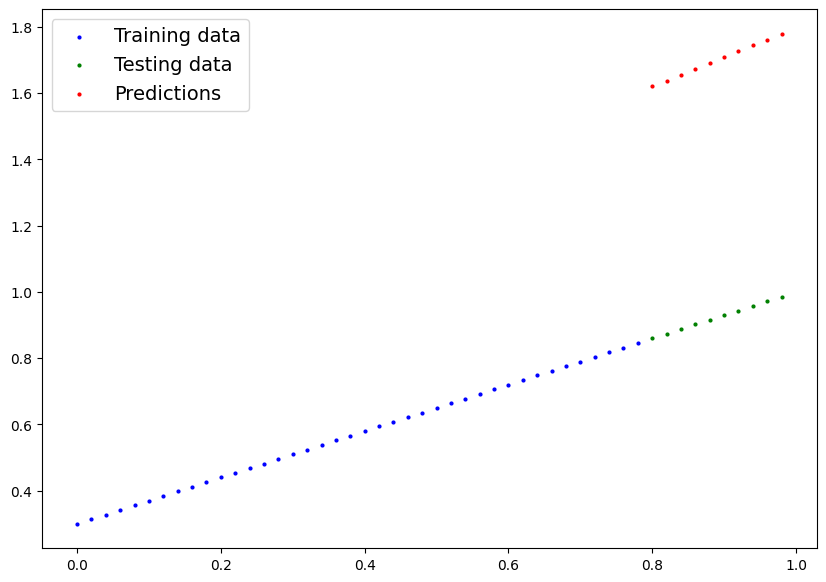

In [41]:
plot_predictions(predictions = y_preds)

### 3. Train model
The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be acalled cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to mensure how wrong is your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case )  to improve the loss function.

And specifically to PyTorch, we need:
* A training loop
* A testing loop

In [43]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [50]:
#Setup a loss function]
loss_fn = nn.L1Loss()
#Setup a optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)